<a href="https://colab.research.google.com/github/aboelela924/Mastering-Computer-vision-with-TensorFlow-2/blob/master/Mastering_Computer_vision_with_TensorFlow_2_Chapter_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imagehash
!pip install distance

     |████████████████████████████████| 296kB 2.7MB/s 
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=7b38f15eeb43dfa4679fc1c523982d1b02d0a512208735a044a00cb2cbfdddc6
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built imagehash
     |████████████████████████████████| 184kB 2.8MB/s 
  Created wheel for distance: filename=Distance-0.1.3-cp36-none-any.whl size=16262 sha256=c174492a9c972e09b6b79085d58b86f44b79b23f0c6455ab03bcf0f6ef30f1b0
  Stored in directory: /root/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built distance


In [ ]:
def separate():
    print("")
    print("*-------------------------------------------*")
    print("")

<h1>Hamming Distance</h1>

In [ ]:
from PIL import Image
import imagehash
from scipy.spatial import distance

hash1 = str(imagehash.phash(Image.open("/content/car1.png")))
hash2 = str(imagehash.phash(Image.open("/content/car2.png")))
hash3 = str(imagehash.phash(Image.open("/content/car3.png")))

In [ ]:
print(hash1)
separate()
print(hash2)
separate()
print(hash3)

9a86372888939fbd

*-------------------------------------------*

ffe090a9c116dd32

*-------------------------------------------*

e4eaabec9c919093


In [ ]:
def calcualte_hamming_distance(hash1, hash2):
    distance = 0
    for i in range(len(hash1)):
        if hash1[i] != hash2[i]:
            distance += 1
    return distance 

In [ ]:
print(calcualte_hamming_distance(hash1, hash2))
separate()
print(calcualte_hamming_distance(hash1, hash3))
separate()
print(calcualte_hamming_distance(hash2, hash3))

16

*-------------------------------------------*

14

*-------------------------------------------*

15


<h1>Image Filtering</h1>

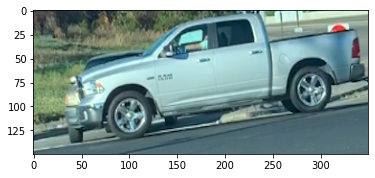


*-------------------------------------------*

(150, 350, 4)

*-------------------------------------------*



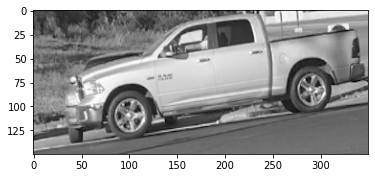


*-------------------------------------------*



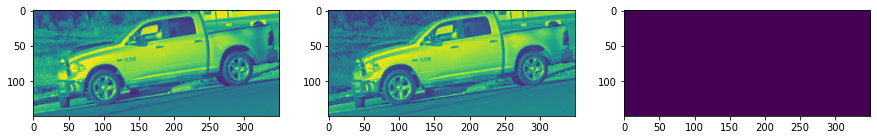

In [ ]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

image = Image.open("/content/car1.png")
plt.imshow(image)
plt.show()
separate()

image = np.asarray(image)
print(image.shape)

separate()

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap="gray")
plt.show()

separate()

w=350
h=125
fig=plt.figure(figsize=(15, 15))
columns = 3
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(image[:, :, i])
plt.show()

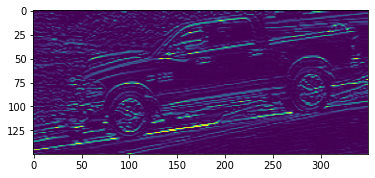

In [ ]:
kernel = np.array([[-1, -1, -1],
                   [2, 2, 2],
                   [-1, -1, -1]])

filtered_car = cv2.filter2D(gray_image, -1, kernel) 
plt.imshow(filtered_car)

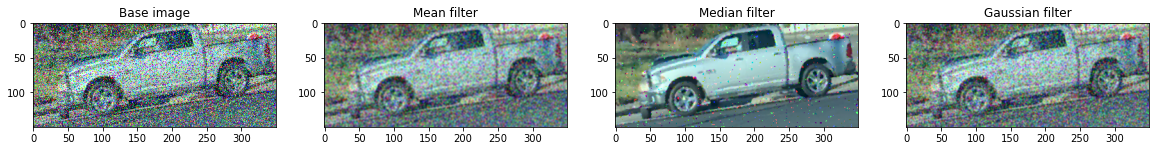

In [ ]:
from skimage.util import random_noise
img = cv2.imread("/content/car1.png")
img_with_noise = random_noise(img, mode="s&p", amount=0.3)
plt.imsave("car1_with_noise.png",img_with_noise)
imgNew = cv2.imread("car1_with_noise.png")
img_noise_mean = cv2.blur(imgNew, (3,3))
img_noise_median = cv2.medianBlur(imgNew,3)
img_noise_gaussian = cv2.GaussianBlur(imgNew, (3,3), 0)

fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(imgNew)
plt.title("Base image")
fig.add_subplot(rows, columns, 2)
plt.imshow(img_noise_mean)
plt.title("Mean filter")
fig.add_subplot(rows, columns, 3)
plt.imshow(img_noise_median)
plt.title("Median filter")
fig.add_subplot(rows, columns, 4)
plt.imshow(img_noise_gaussian)
plt.title("Gaussian filter")
plt.show()

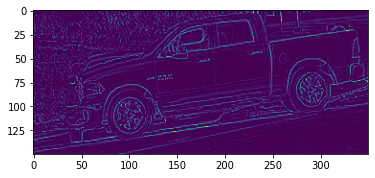

In [ ]:
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

filtered_car = cv2.filter2D(gray_image, -1, kernel) 
plt.imshow(filtered_car)

<h1>Edge detection</h1>

In [ ]:
sobelX = cv2.Sobel(gray_image, cv2.CV_64F, 1, 1, ksize=5)
sobelY = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
mag,direction = cv2.cartToPolar(sobelX,sobelY,angleInDegrees =True)
sobelG = np.hypot(sobelX,sobelY)

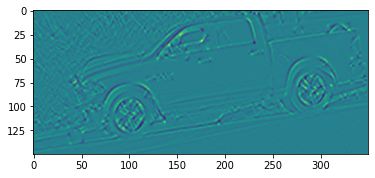

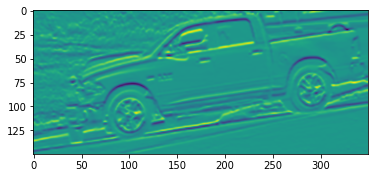

In [ ]:
plt.imshow(sobelX)
plt.show()
plt.imshow(sobelY)
plt.show()

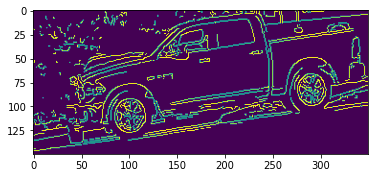

In [ ]:
canny_edges = cv2.Canny(gray_image, 200, 240)
plt.imshow(canny_edges)

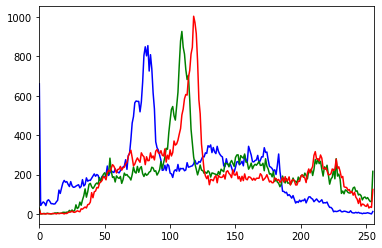

In [ ]:
image_arr = np.asarray(image)
color = ('blue', 'green', 'red')
for i, histcolor in enumerate(color):
    carhistogram = cv2.calcHist([image_arr], [i], None, [256], [0, 256])
    plt.plot(carhistogram, color=histcolor)
    plt.xlim([0, 256])

<h1>Image Matching</h1>

In [ ]:
def display(pic,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    myplot = fig.add_subplot(111)
    myplot.imshow(pic,cmap='gray')

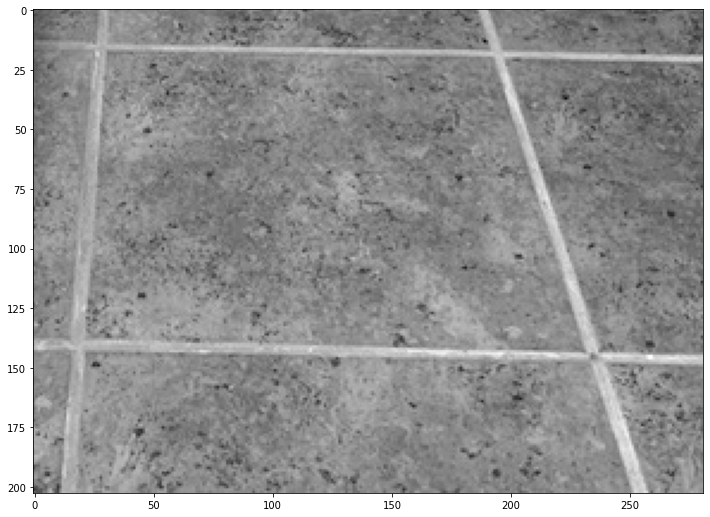

In [ ]:
tile = cv2.imread("tile.jpeg", 0)
display(tile)

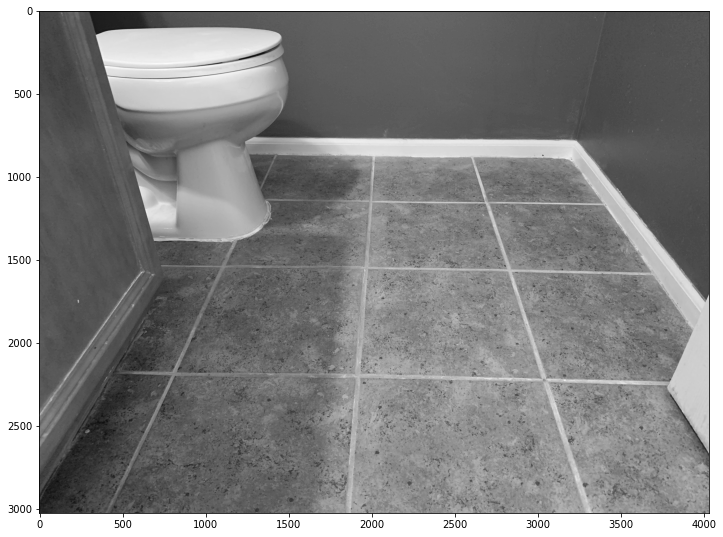

In [ ]:
bathroom = cv2.imread("bathroom_image.jpeg", 0)
display(bathroom)

In [ ]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(tile, None)
kp2, des2 = orb.detectAndCompute(bathroom, None)

In [ ]:
# for i in range(len(kp1)):
#     print(kp1[i].pt)

In [ ]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [ ]:
matches = matcher.match(des1, des2)
matches = sorted(matches, key=lambda x:x.distance)

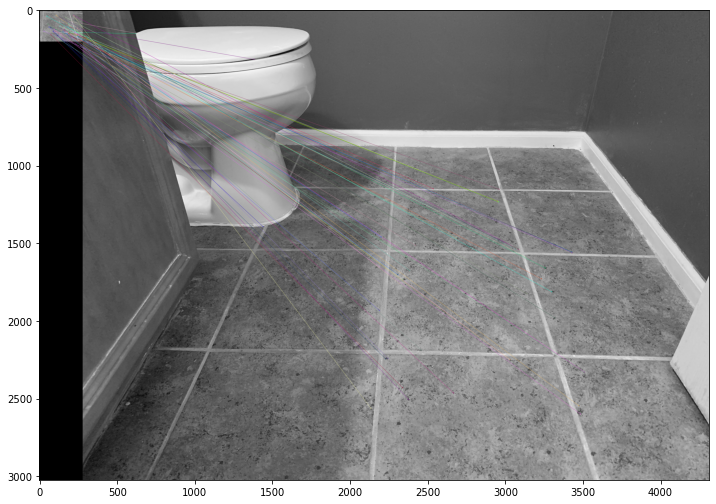

In [ ]:
floor_matches = cv2.drawMatches(tile, kp1, bathroom, kp2, matches[:50], None, flags=2)
display(floor_matches)

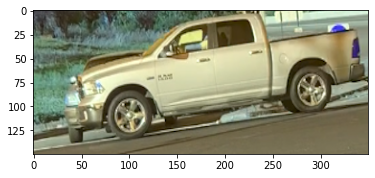

In [ ]:
plt.imshow(img)

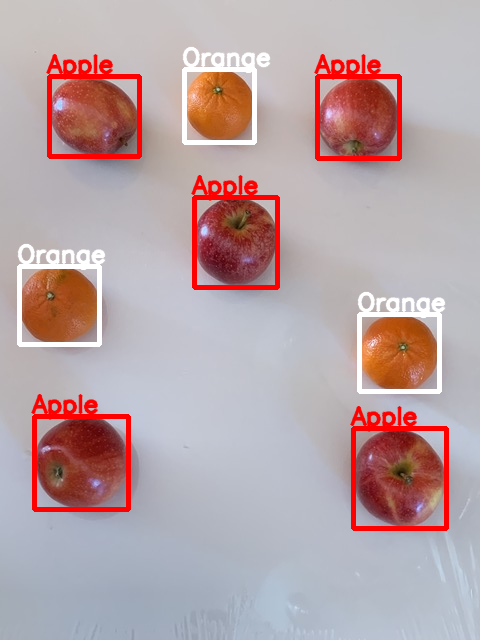

In [43]:
from google.colab.patches import cv2_imshow

img = cv2.imread('appleorange.JPG')

threshold = 100
canny_output = cv2.Canny(img, threshold, 200)
contours, hierarchy = cv2.findContours(canny_output, cv2.RETR_EXTERNAL, 
                                       cv2.CHAIN_APPROX_SIMPLE)

count = 0
font = cv2.FONT_HERSHEY_SIMPLEX

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w>20 and h>20):
        count += 1
        ROI = img[y+int(h/4):int(y+3*h/4), x+int(w/4):x+int(3*w/4)]
        ROI_meancolor = cv2.mean(ROI)
        if ROI_meancolor[0] > 30 and ROI_meancolor[0] < 40 \
            and ROI_meancolor[1] > 70 and ROI_meancolor[1] < 105\
            and ROI_meancolor[2] > 150 and ROI_meancolor[2] < 200:

            cv2.putText(img, "Orange", (x-2, y-4), font, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.rectangle(img, (x, y), (x+w, h+y), (255, 255, 255), 3)

        else:

            cv2.putText(img, "Apple", (x-2, y-4), font, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
            cv2.rectangle(img, (x, y), (x+w, h+y), (0, 0, 255), 3)
cv2_imshow(img)